## transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and colour each data point with specific class.

In [1]:
#import the libraries

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

from sklearn import decomposition
from sklearn import datasets

In [2]:
# load the iris dataset from sklearn library and build matrix of features and target
iris = datasets.load_iris()
features = iris['data']
arr_target = iris['target']
arr_target_name = iris['target_names']
target = [[i] for i in arr_target_name[arr_target]]

In [3]:
"""
Visualizing upto 3 dimensional data is not challenging.However, the Iris dataset contains 4D data. 
You can use PCA technique to reduce 4 dimensional data into 3 dimensions so that we can plot and understand the data better.
Before applying PCA, it is better to standardize the dataset’s features onto unit scale using StandardScalar
"""
from sklearn.preprocessing import StandardScaler
# Standardizing the features
features = StandardScaler().fit_transform(features)

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(features)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [8]:
finalDf = pd.concat([principalDf, pd.DataFrame(target,columns=['target'])], axis = 1)
finalDf

,principal component 1,principal component 2,principal component 3,target
0,-2.264703,0.480027,-0.127706,setosa
1,-2.080961,-0.674134,-0.234609,setosa
2,-2.364229,-0.341908,0.044201,setosa
3,-2.299384,-0.597395,0.091290,setosa
4,-2.389842,0.646835,0.015738,setosa
...,...,...,...,...
145,1.870503,0.386966,0.256274,virginica
146,1.564580,-0.896687,-0.026371,virginica
147,1.521170,0.269069,0.180178,virginica
148,1.372788,1.011254,0.933395,virginica


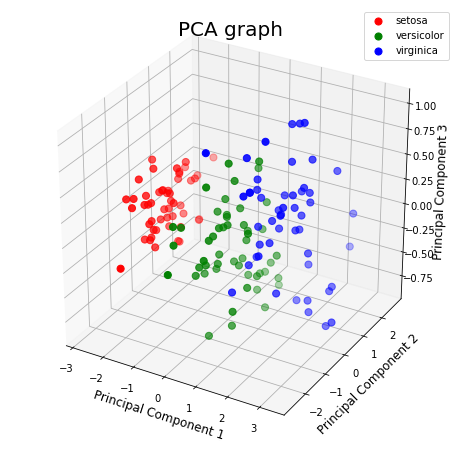

In [9]:
# Create the figure
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 12)
ax.set_ylabel('Principal Component 2', fontsize = 12)
ax.set_zlabel('Principal Component 3', fontsize = 12)
ax.set_title('PCA graph', fontsize = 20)

targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()